<a href="https://colab.research.google.com/github/adityaraj4400/Opinion-mining-on-sarcasm-detection/blob/main/Code/Opinion_mining_on_sarcasm_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn.metrics as mt
from tabulate import tabulate
from sklearn.svm import LinearSVC
import sklearn.model_selection as ms
from matplotlib import pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from sklearn.model_selection import train_test_split


In [ ]:
filename = '/content/drive/MyDrive/majorprojet/amazon_unlocked_mobile_datasets_with_sentiment.csv'
names = ['product.name', 'brand.name', 'review.text', 'review.process', 'review.tokened', 'score', 'sentiment']
fields = ['review.tokened', 'sentiment']
review = pd.read_csv(filename ,names=names, usecols=fields)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/majorprojet/amazon_unlocked_mobile_datasets_with_sentiment.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64754 entries, 0 to 64753
Data columns (total 7 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                                                                                  --------------  -----  
 0   "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*

In [ ]:
df1.head()

,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,"I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!",i feel so lucky to have found this used phone to us not used hard at all phone on line from someone who upgraded and sold this one my son liked his old one that finally fell apart after years and did not want an upgrade thank you seller we really appreciate it your honesty re said used phone i recommend this seller very highly would but from them again,feel lucky find use phone not use hard phone line someone upgrade sell son like old finally fell apart year not want upgrade thank seller really appreciate honesty say use phone recommend seller highly,0.822,positive
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,"nice phone, nice up grade from my pantach revu...",nice phone nice up grade from my pan tach revu...,nice phone nice grade pan tach revue clean set...,0.923,positive
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,Very pleased,very pleased,pleased,0.493,positive
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,It works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,work good go slow sometimes good phone love,0.918,positive
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,Great phone to replace my lost phone. The only...,great phone to replace my lost phone the only ...,great phone replace lose phone thing volume bu...,0.696,positive
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,I already had a phone with problems... I know ...,i already had a phone with problems i know it ...,already phone problem know state used dang not...,-0.906,negative


In [ ]:
print('split data --- start')
array = review.values
X = array[:, 0:1]
Y = array[:, 1]
size = 0.3

split data --- start


In [ ]:
trainX, testX, trainY, testY = ms.train_test_split(X, Y, test_size=size, shuffle=True)
print('split data --- end')

split data --- end


In [ ]:
print('feature extraction --- start')
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1, 2), sublinear_tf=False,
                     max_features=10000, smooth_idf=True, stop_words='english')
tv_train = tv.fit_transform(trainX.ravel())
tv_test = tv.transform(testX.ravel())  # transform test review into features
print('feature extraction --- end')

feature extraction --- start
feature extraction --- end


In [ ]:
print('latent semantic analysis --- start')
svd = TruncatedSVD(100)
lsa = make_pipeline(svd, Normalizer(copy=False))
lsa_train = lsa.fit_transform(tv_train)
lsa_test = lsa.transform(tv_test)  # transform tfidf test
print('latent semantic analysis --- end')

latent semantic analysis --- start
latent semantic analysis --- end


In [ ]:
print('build and predict --- start')
svm = LinearSVC()
svm.fit(lsa_train, trainY)
svm_pred = svm.predict(lsa_test)
print('build and predict --- end')

build and predict --- start
build and predict --- end


In [ ]:
print('\nModel Evaluation:')
svm_accuracy = np.round(mt.accuracy_score(testY, svm_pred), 3)
svm_precision = np.round(mt.precision_score(testY, svm_pred, average='macro'), 3)
svm_recall = np.round(mt.recall_score(testY, svm_pred, average='macro'), 3)
svm_f1 = np.round(mt.f1_score(testY, svm_pred, average='macro'), 3)


Model Evaluation:


In [ ]:
svm_metrics = np.array([svm_accuracy, svm_precision, svm_recall, svm_f1])
svm_metrics = pd.DataFrame([svm_metrics], columns=['accuracy', 'precision', 'recall', 'f1'], index=['metrics'])
print('Performance Metrics:')
print(tabulate(svm_metrics, headers='keys', tablefmt='github'))

Performance Metrics:
|         |   accuracy |   precision |   recall |    f1 |
|---------|------------|-------------|----------|-------|
| metrics |      0.816 |       0.715 |    0.691 | 0.703 |


<Figure size 432x288 with 0 Axes>

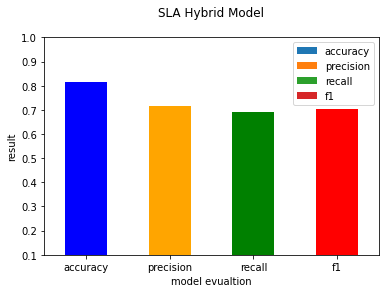

In [ ]:
fig = plt.figure()
ax = svm_metrics.plot.bar()
plt.title('SLA Hybrid Model\n')
plt.ylabel('result')
plt.xlabel('model evualtion')
# Create a sample dataframe with an text index
plotdata = pd.DataFrame(
    {"sla_hybrid": [svm_accuracy, svm_precision, svm_recall, svm_f1]}, 
    index=["accuracy", "precision", "recall", "f1"])
# Plot a bar chart
#plotdata.plot(kind="bar")
plotdata['sla_hybrid'].plot(kind="bar", color=['blue', 'orange', 'green', 'red'])
plt.xticks(rotation=-360)  # rotate x labels
plt.ylim([0.1, 1.0])
plt.savefig('hybrid_performance.png', format='png', transparent=True)  # save result
plt.show()

In [ ]:
print('\nConfusion Matrix of SLA Hybrid Approach:\n')


Confusion Matrix of SLA Hybrid Approach:



In [ ]:
labels = ['positive', 'negative', 'neutral']
svm_cm = mt.confusion_matrix(testY, svm_pred, labels=labels)

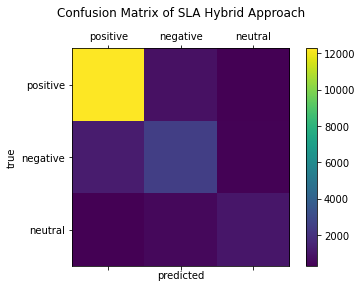

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Confusion Matrix of SLA Hybrid Approach\n')
fig.colorbar(ax.matshow(svm_cm))
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('predicted')
plt.ylabel('true')
plt.savefig('hybrid_confusion_matrix.png',  format='png', transparent=False)  # save result
plt.show()